In [1]:
# Ipython Notebook
# Carolina Monzo - 16-10-2018
# Tests to create plots for VLT-Tesis

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')

## 400 exomes plots

In [4]:
# Read pandas dataframe from the tsv we created
header = ["Sample", "dp5", "dp10", "dp15", "dp20", "dp25", "dp30", "dp35", "dp40", "dp45", "dp50", "mean"]
df = pd.read_csv("400_samples/400_probes_all.tsv", names=header, index_col="Sample", sep='\t')
df.head()
df2 = pd.read_csv("400_samples/400_exons_all.tsv", names=header, index_col='Sample', sep='\t')
df3 = pd.read_csv("400_samples/400_exo-probe_all.tsv", names=header, index_col = 'Sample', sep='\t')

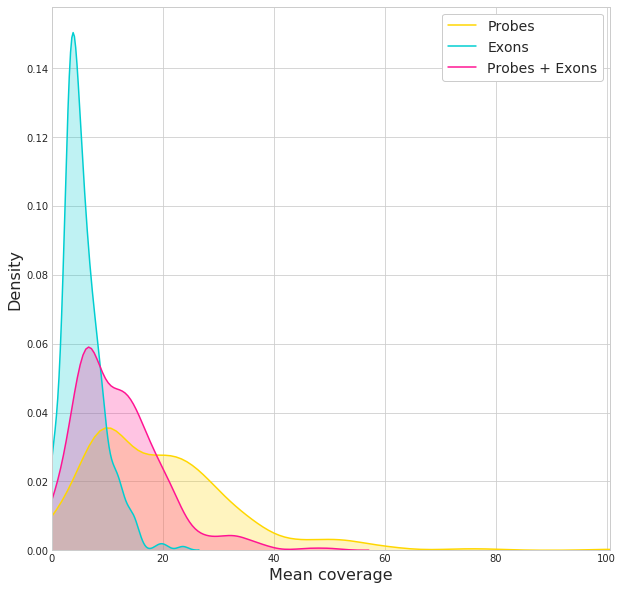

In [13]:
# Plot density for each study
fig = plt.figure(figsize=(10,10))

sns.kdeplot(df["mean"], shade=True, label="Probes", color="gold")
sns.kdeplot(df2["mean"], shade=True, label="Exons", color="darkturquoise")
sns.kdeplot(df3["mean"], shade=True, label="Probes + Exons", color="deeppink")
#sns.kdeplot(df["dp5"], shade=True)
plt.xlim(0, df["mean"].max())
plt.xlabel("Mean coverage", fontsize = 16)
plt.ylabel("Density", fontsize = 16)
#The y-axis in a density plot is the probability density function for the kernel density estimation.
leg = plt.legend(fontsize = 14, framealpha = 1, frameon = True)
#plt.tight_layout()
#plt.savefig("density_coverage_all400.png")
plt.show()
plt.close(fig)

#### Cases

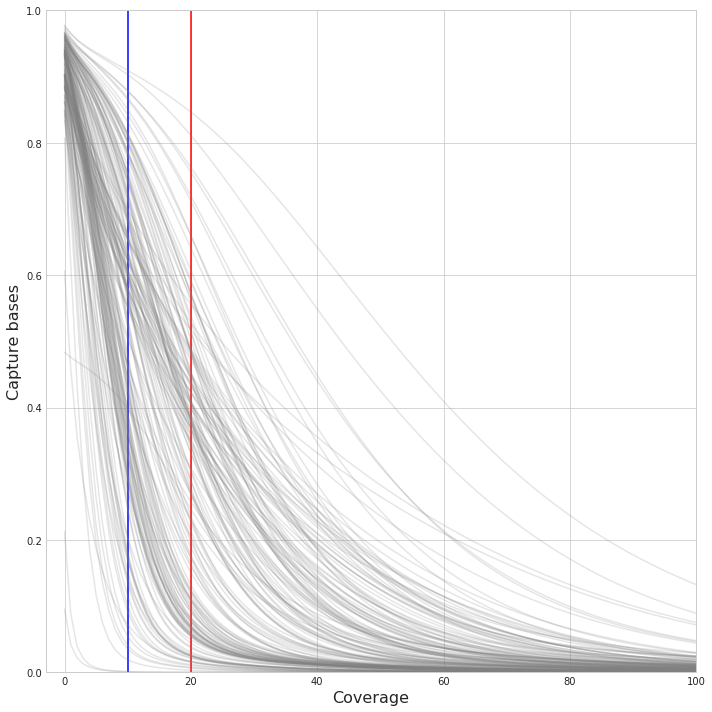

In [16]:
# Get list of bedtools output files we want to plot
with open("400_samples/hist-400_cases.fof", "r") as fi:
    files = fi.read().splitlines()
    
# Create labels removing the end
labels = [e.split(".")[0] for e in files]

# Get coverage and cumulative coverage for each file and read data into the lists
cov = []
cov_cumul = []

for i in range(0, len(files)):
    
    dfN = pd.read_csv(files[i], sep='\t', names = ["all", "num", "st", "en", "value"])
    dfN["value"] = dfN["value"].map(lambda x: '{:.7f}'.format(x)).astype('float')
    
    cov.append(dfN)

    cov_cumul.append(1 - cov[i]["value"].cumsum())

# Establish general grid
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.xlabel("Coverage", fontsize = 16)
plt.ylabel("Capture bases", fontsize = 16)
ax.vlines(x=10, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='blue')
ax.vlines(x=20, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='red')
plt.ylim(0, 1.0)
plt.xlim(-3, 100)
# Plot the data

for i in range(0, len(cov)):
    #ax.plot(cov[i][2:401,2], cov_cumul[i][1:400], color='gray')

    ax.plot(cov[i]["num"], cov_cumul[i], color = 'gray', alpha = 0.2)
    
#ax.plot(cov[i]["num"], sum(cov_cumul)/float(len(cov_cumul)), color = 'red')
plt.tight_layout()
plt.savefig("400_samples/400-probes_cases_amplitud.png")
plt.show()
plt.close()

#### Controls

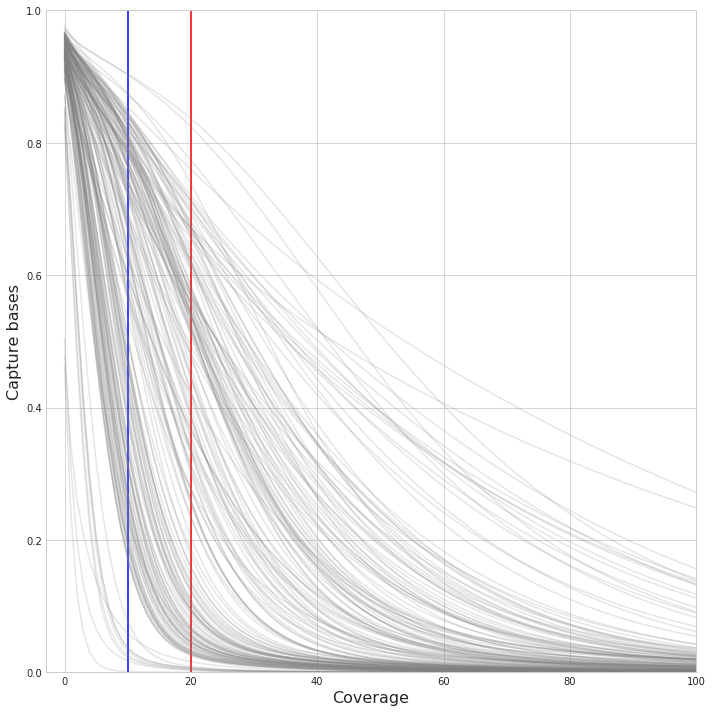

In [15]:
# Get list of bedtools output files we want to plot
with open("400_samples/hist-400_controls.fof", "r") as fi:
    files = fi.read().splitlines()
    
# Create labels removing the end
labels = [e.split(".")[0] for e in files]

# Get coverage and cumulative coverage for each file and read data into the lists
cov = []
cov_cumul = []

for i in range(0, len(files)):
    
    dfN = pd.read_csv(files[i], sep='\t', names = ["all", "num", "st", "en", "value"])
    dfN["value"] = dfN["value"].map(lambda x: '{:.7f}'.format(x)).astype('float')
    
    cov.append(dfN)

    cov_cumul.append(1 - cov[i]["value"].cumsum())

# Establish general grid
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.xlabel("Coverage", fontsize = 16)
plt.ylabel("Capture bases", fontsize = 16)
ax.vlines(x=10, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='blue')
ax.vlines(x=20, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[-1], color='red')
plt.ylim(0, 1.0)
plt.xlim(-3, 100)
# Plot the data

for i in range(0, len(cov)):
    #ax.plot(cov[i][2:401,2], cov_cumul[i][1:400], color='gray')

    ax.plot(cov[i]["num"], cov_cumul[i], color = 'gray', alpha = 0.2)
    
#ax.plot(cov[i]["num"], sum(cov_cumul)/float(len(cov_cumul)), color = 'red')
plt.tight_layout()
plt.savefig("400_samples/400-probes_controls_amplitud.png")
plt.show()
plt.close()

In [21]:
print(f"Mean of 400 probes all: {df['mean'].mean()}")
print(f"Std of 400 probes all: {df['mean'].std()}")
print(f"Mean of 400 exons all: {df2['mean'].mean()}")
print(f"Std of 400 exons all: {df2['mean'].std()}")
print(f"Mean of 400 exo-probes all: {df3['mean'].mean()}")
print(f"Std of 400 exo-probes all: {df3['mean'].std()}")

Mean of 400 probes all: 19.24474197855228
Std of 400 probes all: 13.505661983398843
Mean of 400 exons all: 5.587438402419351
Std of 400 exons all: 3.5047887255393735
Mean of 400 exo-probes all: 11.881473989189196
Std of 400 exo-probes all: 7.870586995431312


In [22]:
# Get stats for all groups
# Read pandas dataframe from the tsv we created
header = ["Sample", "dp5", "dp10", "dp15", "dp20", "dp25", "dp30", "dp35", "dp40", "dp45", "dp50", "mean"]
df_pcont = pd.read_csv("400_samples/400_probes_controls.tsv", names=header, index_col="Sample", sep='\t')
df_pcas = pd.read_csv("400_samples/400_probes_cases.tsv", names=header, index_col='Sample', sep='\t')
df_econt = pd.read_csv("400_samples/400_exons_controls.tsv", names=header, index_col = 'Sample', sep='\t')
df_ecas = pd.read_csv("400_samples/400_exons_cases.tsv", names=header, index_col = 'Sample', sep='\t')
df_epcont = pd.read_csv("400_samples/400_exo-prob_control.tsv", names=header, index_col = 'Sample', sep='\t')
df_epcas = pd.read_csv("400_samples/400_exo-prob_cases.tsv", names=header, index_col = 'Sample', sep='\t')

In [35]:
df_pcont.describe().to_csv("400_samples/probes_control-stats.tsv", sep='\t')
df_pcas.describe().to_csv("400_samples/probes_cas-stats.tsv", sep='\t')

In [30]:
df_epcas.describe()

,dp5,dp10,dp15,dp20,dp25,dp30,dp35,dp40,dp45,dp50,mean
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,0.456216,0.323245,0.232184,0.170814,0.128226,0.097784,0.075571,0.059117,0.046772,0.037408,10.588014
std,0.135160,0.145314,0.138909,0.122902,0.105069,0.088802,0.074916,0.063275,0.053532,0.045376,6.109619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.430489,0.230646,0.111348,0.058286,0.033311,0.021947,0.015647,0.011535,0.008672,0.006790,6.247820
50%,0.474664,0.354620,0.246156,0.168792,0.113243,0.077866,0.052904,0.035912,0.027264,0.020396,10.023000
75%,0.552180,0.436822,0.335727,0.255305,0.204296,0.155461,0.116833,0.090329,0.068062,0.052022,14.224600
max,0.639331,0.591765,0.557086,0.522071,0.485748,0.447929,0.409301,0.370696,0.333057,0.297104,36.851300


In [31]:
df = pd.read_csv("400_samples/400_probes_all.tsv", names=header, sep='\t')
df.head()
df2 = pd.read_csv("400_samples/400_exons_all.tsv", names=header, sep='\t')
df3 = pd.read_csv("400_samples/400_exo-probe_all.tsv", names=header, sep='\t')

In [33]:
dfnew = pd.DataFrame()
dfnew["probes"] = df["mean"]
dfnew["exons"] = df2["mean"]
dfnew["exo-prob"] = df3["mean"]
dfnew.head()

,probes,exons,exo-prob
0,11.1110,2.91838,7.23188
1,25.2628,5.01269,15.09990
2,23.4415,6.35551,13.78750
3,19.7648,3.70427,12.01700
4,17.8204,3.40966,10.82450


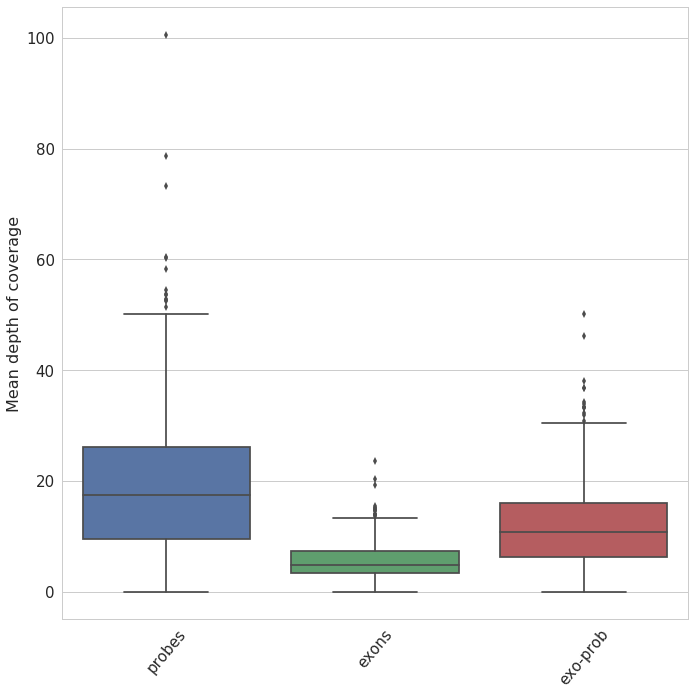

In [34]:
# Plot density for each study
fig = plt.figure(figsize=(10,10))
sns.set(font_scale=1.5, style='whitegrid')
sns.boxplot(data=dfnew)
#plt.boxplot(df2["mean"])
#plt.boxplot(df3["mean"])
#plt.xlabel("Samples", fontsize = 16)
plt.ylabel("Mean depth of coverage", fontsize = 16)
plt.xticks(rotation=50)
plt.tight_layout()
plt.savefig("400_samples//mean_depth.png")
plt.show()
plt.close(fig)